<a href="https://colab.research.google.com/github/FabioArnez/Pytorch_Training/blob/master/Pytorch%20Training%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Training Notebook

## MNIST Example

- Image size 28x28 pixels $\rightarrow$ 784

### Fully Connected MLP Network

Import Torch Libraries

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Check if CPU | GPU will be used

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if device == "cuda":
    device_name = "CUDA"
else:
    device_name = "CPU"

print("% s will be used for training/testing" % device_name)

CPU will be used for training/testing


Define network Hyperparameters

In [ ]:
# neural net input size
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

Load MNIST Dataset

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='../data',
                                           train=True,
                                           transform= transforms.ToTensor(),
                                           download=True)


test_dataset = torchvision.datasets.MNIST(root='../data',
                                          train=False,
                                          transform=transforms.ToTensor())

0it [00:00, ?it/s]

9920512it [01:53, 117600.48it/s]                             

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



0it [00:00, ?it/s]


 57%|█████▋    | 16384/28881 [00:00<00:00, 121461.00it/s]
32768it [00:00, 123658.37it/s]                           
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



 85%|████████▌ | 1409024/1648877 [00:15<00:01, 149958.98it/s]
9920512it [02:10, 117600.48it/s] [00:15<00:01, 160050.65it/s]
 99%|█████████▉| 1638400/1648877 [00:17<00:00, 84802.61it/s]
1654784it [00:17, 94928.22it/s]                             

0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




  0%|          | 0/4542 [00:00<?, ?it/s]

8192it [00:00, 31450.96it/s]            

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


Data Loader

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Build the nueral network

In [ ]:
class FcnNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
neuralNet_model = FcnNeuralNet(input_size, hidden_size, num_classes).to(device)

Loss Optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(neuralNet_model.parameters(), lr=learning_rate)

Model Training

In [ ]:
total_step = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images =  images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = neuralNet_model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step[{}/{}], Loss:{:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        


Epoch [1/10], Step[100/600], Loss:0.0025
Epoch [1/10], Step[200/600], Loss:0.0047
Epoch [1/10], Step[300/600], Loss:0.0019
Epoch [1/10], Step[400/600], Loss:0.0049
Epoch [1/10], Step[500/600], Loss:0.0029
Epoch [1/10], Step[600/600], Loss:0.0027
Epoch [2/10], Step[100/600], Loss:0.0036
Epoch [2/10], Step[200/600], Loss:0.0018
Epoch [2/10], Step[300/600], Loss:0.0018
Epoch [2/10], Step[400/600], Loss:0.0111
Epoch [2/10], Step[500/600], Loss:0.0015
Epoch [2/10], Step[600/600], Loss:0.0111
Epoch [3/10], Step[100/600], Loss:0.0112
Epoch [3/10], Step[200/600], Loss:0.0020
Epoch [3/10], Step[300/600], Loss:0.0044
Epoch [3/10], Step[400/600], Loss:0.0028
Epoch [3/10], Step[500/600], Loss:0.0375
Epoch [3/10], Step[600/600], Loss:0.0010
Epoch [4/10], Step[100/600], Loss:0.0075
Epoch [4/10], Step[200/600], Loss:0.0013
Epoch [4/10], Step[300/600], Loss:0.0019
Epoch [4/10], Step[400/600], Loss:0.0003
Epoch [4/10], Step[500/600], Loss:0.0030
Epoch [4/10], Step[600/600], Loss:0.0036
Epoch [5/10], St

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = neuralNet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 98.17 %


In [ ]:
print(FcnNeuralNet)

<class '__main__.FcnNeuralNet'>


### Fully Connected MLP with Dropout

In [3]:
!pip3 install torch==1.4.0+cu92 torchvision==0.5.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 640.6MB 29kB/s 
     |████████████████████████████████| 4.0MB 929kB/s 
  Found existing installation: torch 1.2.0+cu92
    Uninstalling torch-1.2.0+cu92:
      Successfully uninstalled torch-1.2.0+cu92
  Found existing installation: torchvision 0.4.0+cu92
    Uninstalling torchvision-0.4.0+cu92:
      Successfully uninstalled torchvision-0.4.0+cu92


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler

In [3]:
torch.cuda.get_device_name(0)

'GeForce RTX 2080'

In [4]:
torch.cuda.is_available()

True

In [5]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("% s will be used for training/testing" % device)

cuda will be used for training/testing


In [6]:
# neural net input size
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
learning_rate = 0.001

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2


In [7]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = torchvision.datasets.MNIST(root='../data', train=True,
                                   download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='../data', train=False,
                                  download=True, transform=transform)

100.1%

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


0.0%

0.0%5%

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


0.0%4%

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


180.4%

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


In [8]:
# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

Visualize a batch of Training Data

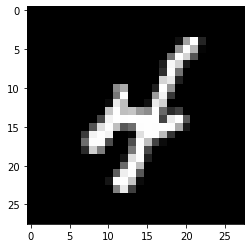

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# obtain one batch of training images
batch_iter = iter(train_loader)
images_batch, labels_batch = batch_iter.next()

image = images_batch[0]

img = np.array(image, dtype='float')
img = img.reshape((28, 28))

plt.imshow(img, cmap='gray')
plt.show()

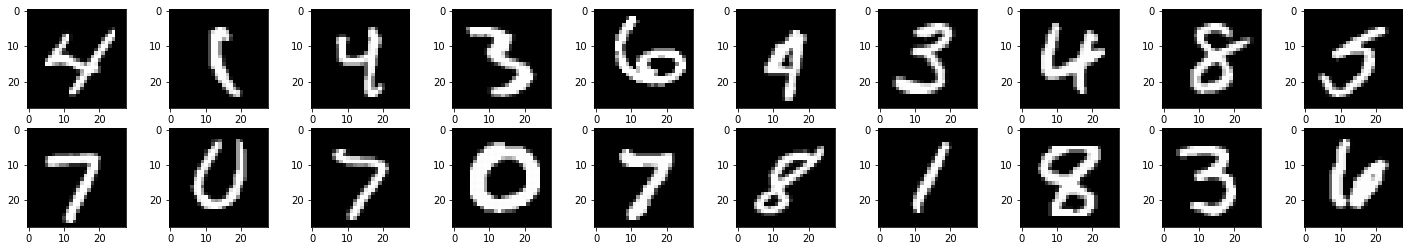

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
batch_iter = iter(train_loader)
images_batch, labels_batch = batch_iter.next()

plt.figure(figsize=(25, 4))
for idx, image in enumerate(images_batch):
    img = np.array(image, dtype='float')
    img = img.reshape((28, 28))
    plt.subplot(2, 10, (idx + 1))
    plt.imshow(img, cmap='gray')

plt.show()

In [11]:
# define the NN architecture
class FcnNeuralNetDropOut(nn.Module):
    def __init__(self):
        super().__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout prevents overfitting of data
        # dropout layer (p=0.2)
        self.dropout_02 = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout_02(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = FcnNeuralNetDropOut()
print(model)

FcnNeuralNetDropOut(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout_02): Dropout(p=0.2, inplace=False)
)


__Specify Loss Function and Optimizer__

In [12]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

__Train the Network__

In [13]:
# number of epochs to train the model
n_epochs = 30

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.to(device)
    model.train() # prep model for training
    
    for data, target in train_loader:
        data = data.to(device)
        target = target.to(device)
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.to(device)
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        data = data.to(device)
        target = target.to(device)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss


Epoch: 1 	Training Loss: 0.220397 	Validation Loss: 0.129784
Validation loss decreased (inf --> 0.129784).  Saving model ...
Epoch: 2 	Training Loss: 0.095008 	Validation Loss: 0.122574
Validation loss decreased (0.129784 --> 0.122574).  Saving model ...
Epoch: 3 	Training Loss: 0.066830 	Validation Loss: 0.094471
Validation loss decreased (0.122574 --> 0.094471).  Saving model ...
Epoch: 4 	Training Loss: 0.052182 	Validation Loss: 0.097946
Epoch: 5 	Training Loss: 0.044359 	Validation Loss: 0.114644
Epoch: 6 	Training Loss: 0.037023 	Validation Loss: 0.094976
Epoch: 7 	Training Loss: 0.030969 	Validation Loss: 0.129588
Epoch: 8 	Training Loss: 0.032044 	Validation Loss: 0.128357
Epoch: 9 	Training Loss: 0.026451 	Validation Loss: 0.124377
Epoch: 10 	Training Loss: 0.026783 	Validation Loss: 0.123770
Epoch: 11 	Training Loss: 0.022827 	Validation Loss: 0.199682
Epoch: 12 	Training Loss: 0.026515 	Validation Loss: 0.200349
Epoch: 13 	Training Loss: 0.020864 	Validation Loss: 0.156360
E

__Test the Model__

Test setup

In [14]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# prep model for evaluation
model.eval()

FcnNeuralNetDropOut(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout_02): Dropout(p=0.2, inplace=False)
)

test loop

In [15]:
for data, target in test_loader:
    data = data.to(device)
    target = target.to(device)
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

In [16]:
# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.287760

Test Accuracy of     0: 99% (972/980)
Test Accuracy of     1: 98% (1120/1135)
Test Accuracy of     2: 95% (986/1032)
Test Accuracy of     3: 97% (980/1010)
Test Accuracy of     4: 98% (967/982)
Test Accuracy of     5: 98% (876/892)
Test Accuracy of     6: 96% (927/958)
Test Accuracy of     7: 98% (1014/1028)
Test Accuracy of     8: 98% (961/974)
Test Accuracy of     9: 97% (980/1009)

Test Accuracy (Overall): 97% (9783/10000)


In [17]:
def apply_dropout(m):
    if type(m) == nn.Dropout:
        m.train()

In [18]:
# Apply dropout on testing
model.apply(apply_dropout)

FcnNeuralNetDropOut(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout_02): Dropout(p=0.2, inplace=False)
)

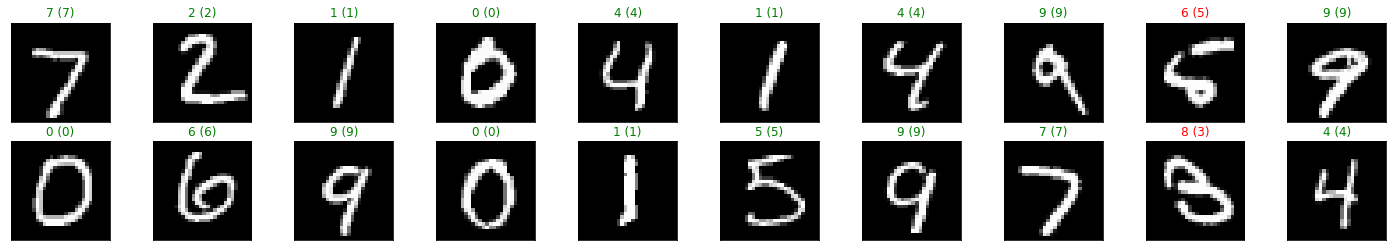

In [19]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

data = images.to(device)
target = labels.to(device)

# get sample outputs
output = model(data)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

In [20]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

data = images[0].to(device)
target = labels[0].to(device)


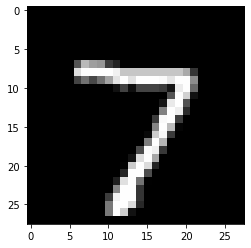

In [21]:
# Plot one sample of the batch
img = np.array(images[0], dtype='float')
img = img.reshape((28, 28))

plt.imshow(img, cmap='gray')
plt.show()

In [22]:
# Nro of Forward passes
T = 20
predictions = []

In [23]:
for t in range(T):
  # forward pass: compute predicted outputs by passing inputs to the model
  output = F.softmax(model(data), dim=1)
  # append the prediction
  predictions.append(output)

In [24]:
print(predictions)

[tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7297e-38, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0789e-38]], device='cuda:0',
       grad_fn=<SoftmaxBackward>), tensor([[0.0000e+00, 1.1210e-44, 0.0000e+00, 0.0000e+00, 6.2049e-35, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 4.3158e-40]], device='cuda:0',
       grad_fn=<SoftmaxBackward>), tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2078e-38, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 1.4237e-42]], device='cuda:0',
       grad_fn=<SoftmaxBackward>), tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.9186e-43, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00]], device='cuda:0',
       grad_fn=<SoftmaxBackward>), tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.1205e-40, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 2.6625e-44]], device='cuda:0',
       grad_fn=<SoftmaxBackward>), tensor([[0.0000e+00, 0.0000e+00, 0.0000

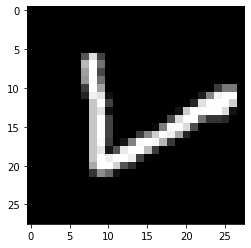

In [25]:
# Plot one sample of the batch
imageTransposed = images[0].T

img = np.array(imageTransposed, dtype='float')
img = img.reshape((28, 28))

plt.imshow(img, cmap='gray')
plt.show()

In [26]:
# Nro of Forward passes
T = 20
predictions = []


In [27]:
imageTransposed = imageTransposed.to(device)
target = labels[0].to(device)

In [28]:
for t in range(T):
  # forward pass: compute predicted outputs by passing inputs to the model
  output = F.softmax(model(imageTransposed), dim=1)
  # append the prediction
  predictions.append(output)

In [29]:
print(predictions)

[tensor([[2.4550e-25, 0.0000e+00, 3.4819e-33, 0.0000e+00, 3.2790e-43, 2.0658e-24,
         1.0000e+00, 0.0000e+00, 1.6337e-17, 0.0000e+00]], device='cuda:0',
       grad_fn=<SoftmaxBackward>), tensor([[1.0376e-25, 0.0000e+00, 1.1329e-31, 0.0000e+00, 3.1178e-34, 5.6624e-15,
         1.0000e+00, 0.0000e+00, 4.5278e-13, 5.7621e-42]], device='cuda:0',
       grad_fn=<SoftmaxBackward>), tensor([[3.7269e-24, 0.0000e+00, 2.7237e-36, 0.0000e+00, 8.4493e-35, 2.9664e-21,
         1.0000e+00, 0.0000e+00, 6.5045e-13, 7.8889e-41]], device='cuda:0',
       grad_fn=<SoftmaxBackward>), tensor([[4.6614e-23, 0.0000e+00, 8.6302e-34, 0.0000e+00, 2.4884e-35, 7.1569e-19,
         1.0000e+00, 0.0000e+00, 9.7984e-15, 8.7355e-39]], device='cuda:0',
       grad_fn=<SoftmaxBackward>), tensor([[5.4548e-26, 0.0000e+00, 4.0995e-27, 0.0000e+00, 6.9220e-34, 1.2224e-14,
         1.0000e+00, 0.0000e+00, 8.1623e-10, 9.4307e-33]], device='cuda:0',
       grad_fn=<SoftmaxBackward>), tensor([[4.9378e-28, 0.0000e+00, 4.1359

In [30]:
import numpy as np

In [31]:
import matplotlib

In [32]:
import pandas as pd

In [56]:
type(output)

torch.Tensor

In [57]:
output.shape

torch.Size([1, 10])

In [58]:
output

tensor([[4.4327e-29, 0.0000e+00, 2.4943e-42, 0.0000e+00, 1.4013e-45, 1.2451e-20,
         1.0000e+00, 0.0000e+00, 4.0359e-19, 1.1491e-43]], device='cuda:0',
       grad_fn=<SoftmaxBackward>)

In [59]:
outputValues = output.tolist()

In [66]:
outputValues

[[4.432706517380187e-29,
  0.0,
  2.4943112664981744e-42,
  0.0,
  1.401298464324817e-45,
  1.2451199986146238e-20,
  1.0,
  0.0,
  4.0358609960496196e-19,
  1.14906474074635e-43]]

In [61]:
outputCPU = output.cpu()

In [62]:
outputCPU.detach().numpy()

array([[4.4327065e-29, 0.0000000e+00, 2.4943113e-42, 0.0000000e+00,
        1.4012985e-45, 1.2451200e-20, 1.0000000e+00, 0.0000000e+00,
        4.0358610e-19, 1.1490647e-43]], dtype=float32)